In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

# Conclave

In [2]:
data_sizes = ['1MB', '10MB', '100MB', '1GB']
query_numbers = [1,5,6]

data_query_dict = {}
for query_num in query_numbers:
    data_size_list = []

    for data_size in data_sizes:
        time_taken_col = f"{data_size}"
        cols = ["size", "timestamp", time_taken_col]
        path = f"demo/{data_size}_tpch_{query_num}_out.txt"
        try:
            data = pd.read_csv(path, names=cols, header=None)
            # data.set_axis(cols, axis=1)
            time_col = data.loc[:,time_taken_col]
            print(time_col, type(time_col))
            data_size_list.append(time_col)

        except:
            print(f"Failed to read file {path}")
    data_query_dict[query_num] = data_size_list

# returns a data_query_dict with key = query_number

0    15.511637
1    16.594966
2    15.339573
3    15.374986
4    15.472468
5    16.495143
6    15.553241
7    15.496414
8    15.355410
Name: 1MB, dtype: float64 <class 'pandas.core.series.Series'>
0    15.717656
1    16.835690
2    15.871664
3    15.670906
4    16.834142
5    15.675222
6    15.946963
7    15.893255
8    15.882880
9    15.645978
Name: 10MB, dtype: float64 <class 'pandas.core.series.Series'>
0     20.104558
1     19.472065
2     19.790516
3     19.795097
4     20.097763
5     19.824222
6     19.968168
7     20.026354
8     19.762512
9     19.702510
10    20.084301
Name: 100MB, dtype: float64 <class 'pandas.core.series.Series'>
0    63.321863
1    60.396788
2    61.768582
3    60.439317
4    61.855187
5    60.569444
6    60.380750
7    61.087477
8    60.545482
9    60.923762
Name: 1GB, dtype: float64 <class 'pandas.core.series.Series'>
0     237.724944
1     246.438931
2     237.659470
3     238.440992
4     237.256153
5     242.745124
6     237.214036
7     243.378507
8 

# Data Station

In [3]:
data_sizes = ['1MB', '10MB', '100MB', '1GB']
query_numbers = [1,2,3]
party_number = 2


query_dict = {}

from collections import defaultdict
for qnum in query_numbers:
    query_dict[qnum] = defaultdict(list)

for data_size in data_sizes:
    time_taken_col = f"{data_size}"
    cols = ["query", time_taken_col]
    path = f"ds_data/conclave_queries/{data_size}_{party_number}.csv"
    print(query_dict)

    # try:
    data = pd.read_csv(path, names=cols, header=None)
    time_col = data.loc[:,time_taken_col]
    query_col = data.loc[:,"query"]
    # data.set_axis(cols, axis=1)
    for idx, query_num in enumerate(query_col):
        query_dict[query_num][data_size].append(time_col[idx])
    print(query_dict)

    # except:
    #     print(f"Failed to read file {path}")
data_station_dict = {}
for qnum in query_numbers:
    data_station_dict[qnum] = [pd.Series(value).rename(k) for k, value in query_dict[qnum].items()]

for i in range(len(data_sizes)):
    print(data_station_dict[2][i])

# Returns a data_station_dict with key = query number

{1: defaultdict(<class 'list'>, {}), 2: defaultdict(<class 'list'>, {}), 3: defaultdict(<class 'list'>, {})}
{1: defaultdict(<class 'list'>, {'1MB': [1.7884645462036133, 1.8171203136444087, 1.786524534225464]}), 2: defaultdict(<class 'list'>, {'1MB': [1.805804967880249, 1.7812776565551758, 1.822716236114502]}), 3: defaultdict(<class 'list'>, {})}
{1: defaultdict(<class 'list'>, {'1MB': [1.7884645462036133, 1.8171203136444087, 1.786524534225464]}), 2: defaultdict(<class 'list'>, {'1MB': [1.805804967880249, 1.7812776565551758, 1.822716236114502]}), 3: defaultdict(<class 'list'>, {})}
{1: defaultdict(<class 'list'>, {'1MB': [1.7884645462036133, 1.8171203136444087, 1.786524534225464], '10MB': [2.0691676139831543]}), 2: defaultdict(<class 'list'>, {'1MB': [1.805804967880249, 1.7812776565551758, 1.822716236114502], '10MB': [2.136162757873535]}), 3: defaultdict(<class 'list'>, {})}
{1: defaultdict(<class 'list'>, {'1MB': [1.7884645462036133, 1.8171203136444087, 1.786524534225464], '10MB': [2.

# Plots

In [4]:
def raw_mmm(df):
    median = df.median()
    min = df.min()
    max = df.max()
    return min, median, max

[(15.339572774013504, 15.496413729037158, 16.594966334989294), (15.64597784599755, 15.877272166020703, 16.835690128034912), (19.472065086010844, 19.824221680057235, 20.10455844097305), (60.38074963109102, 60.74660344404401, 63.32186264405027)]
[(1.786524534225464, 1.7884645462036133, 1.8171203136444087), (2.0691676139831543, 2.0691676139831543, 2.0691676139831543), (4.359954595565796, 4.359954595565796, 4.359954595565796), (26.114098072052, 26.114098072052, 26.114098072052)]


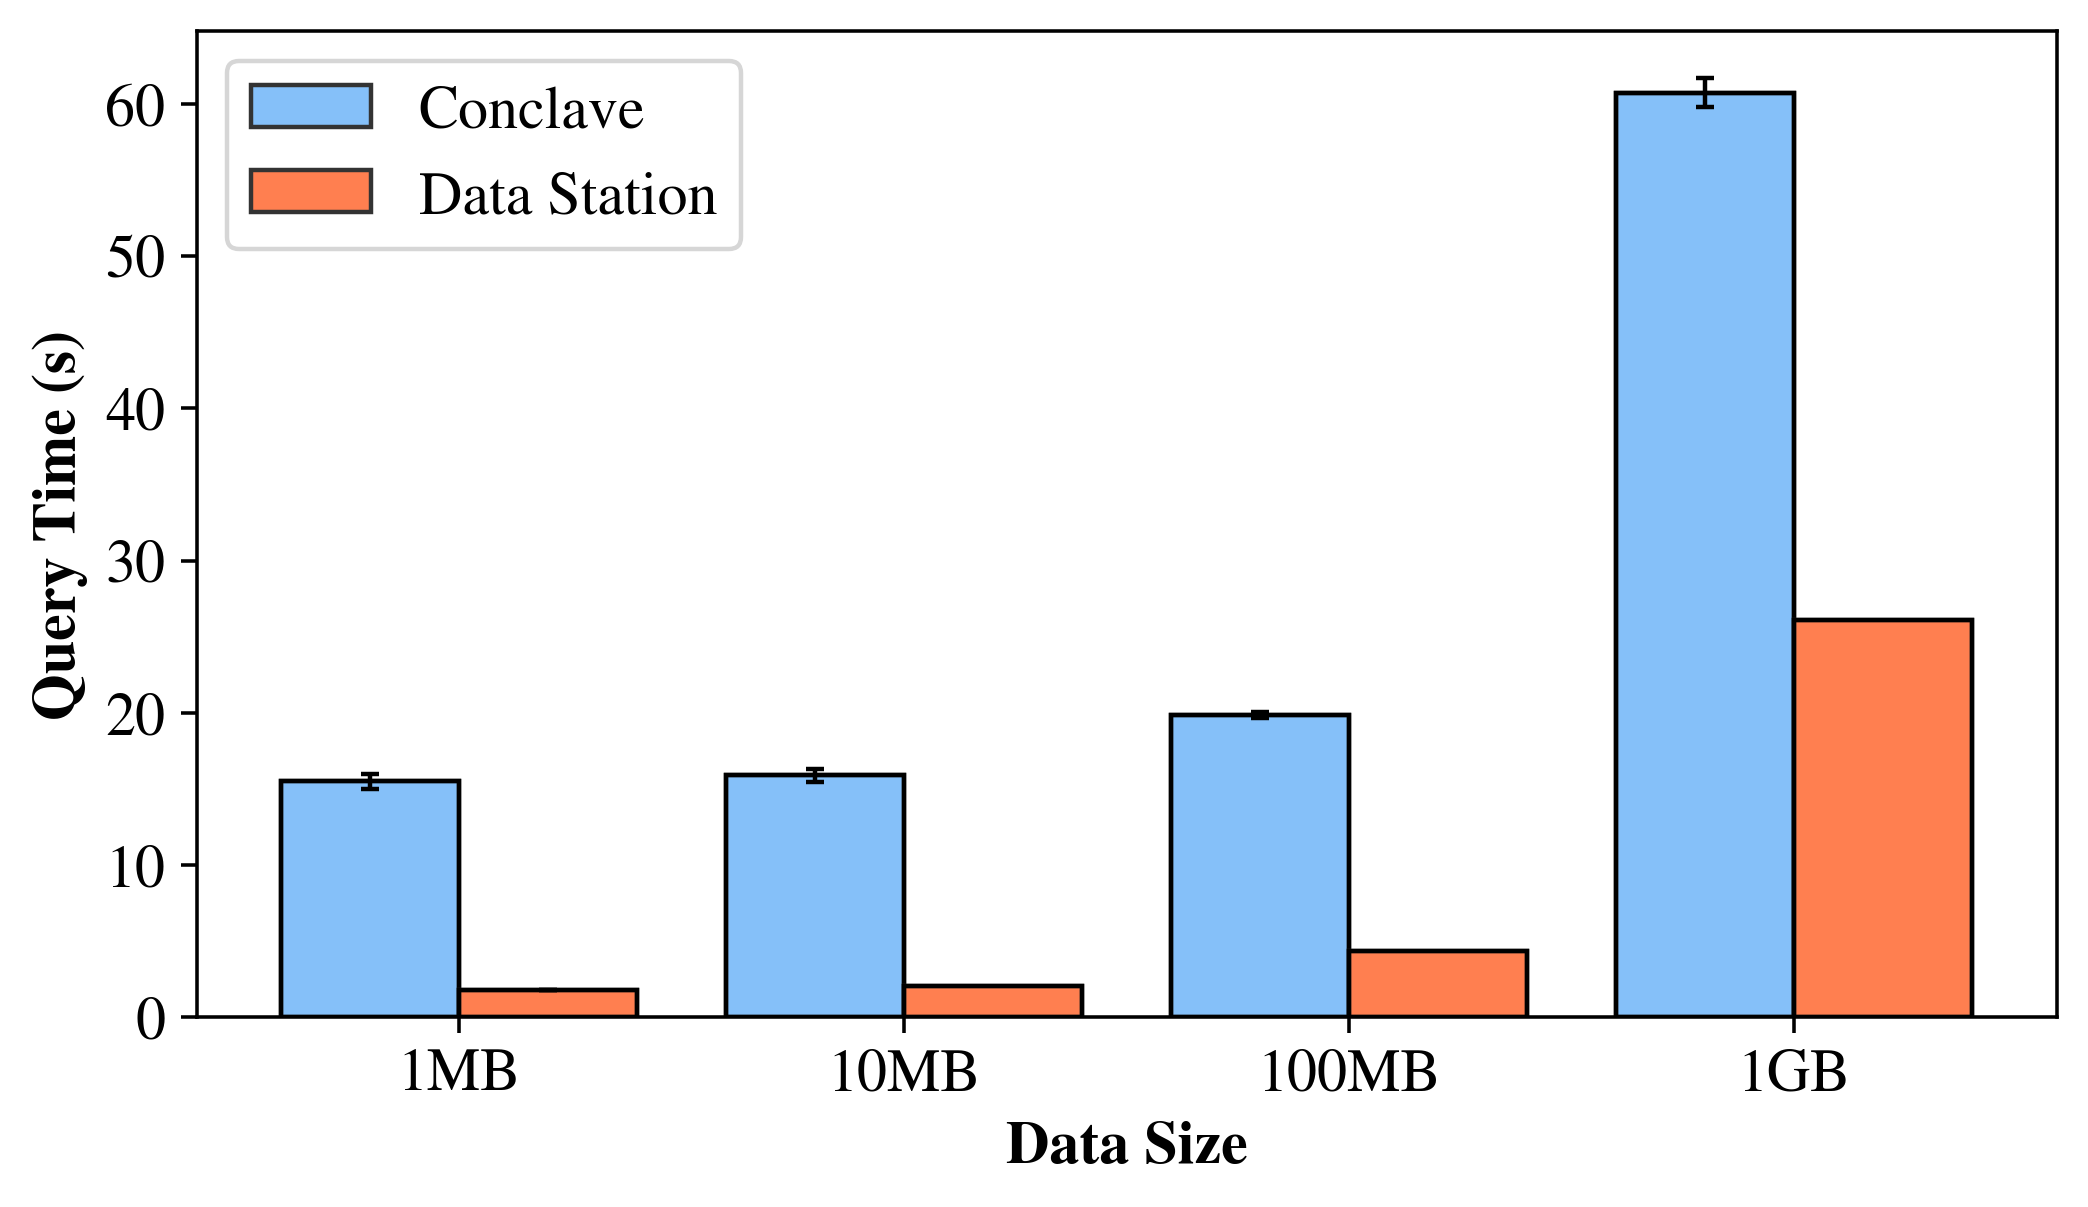

In [5]:
data_left = data_query_dict[1]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[1]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(4)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left]
medians_left = [row[1] for row in data_left_mmm]

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Conclave",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
# plt.title("100GB Database Size")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("q1.pdf", bbox_inches='tight')

plt.show()


[(17.519721946911886, 17.64655939093791, 18.61340688494965), (76.43394565803465, 76.88471179595217, 77.28116888506338)]
[(1.7812776565551758, 1.805804967880249, 1.822716236114502), (2.136162757873535, 2.136162757873535, 2.136162757873535), (4.236936569213867, 4.236936569213867, 4.236936569213867), (26.794176816940308, 26.794176816940308, 26.794176816940308)]
[17.64655939093791, 76.88471179595217, 0, 0]


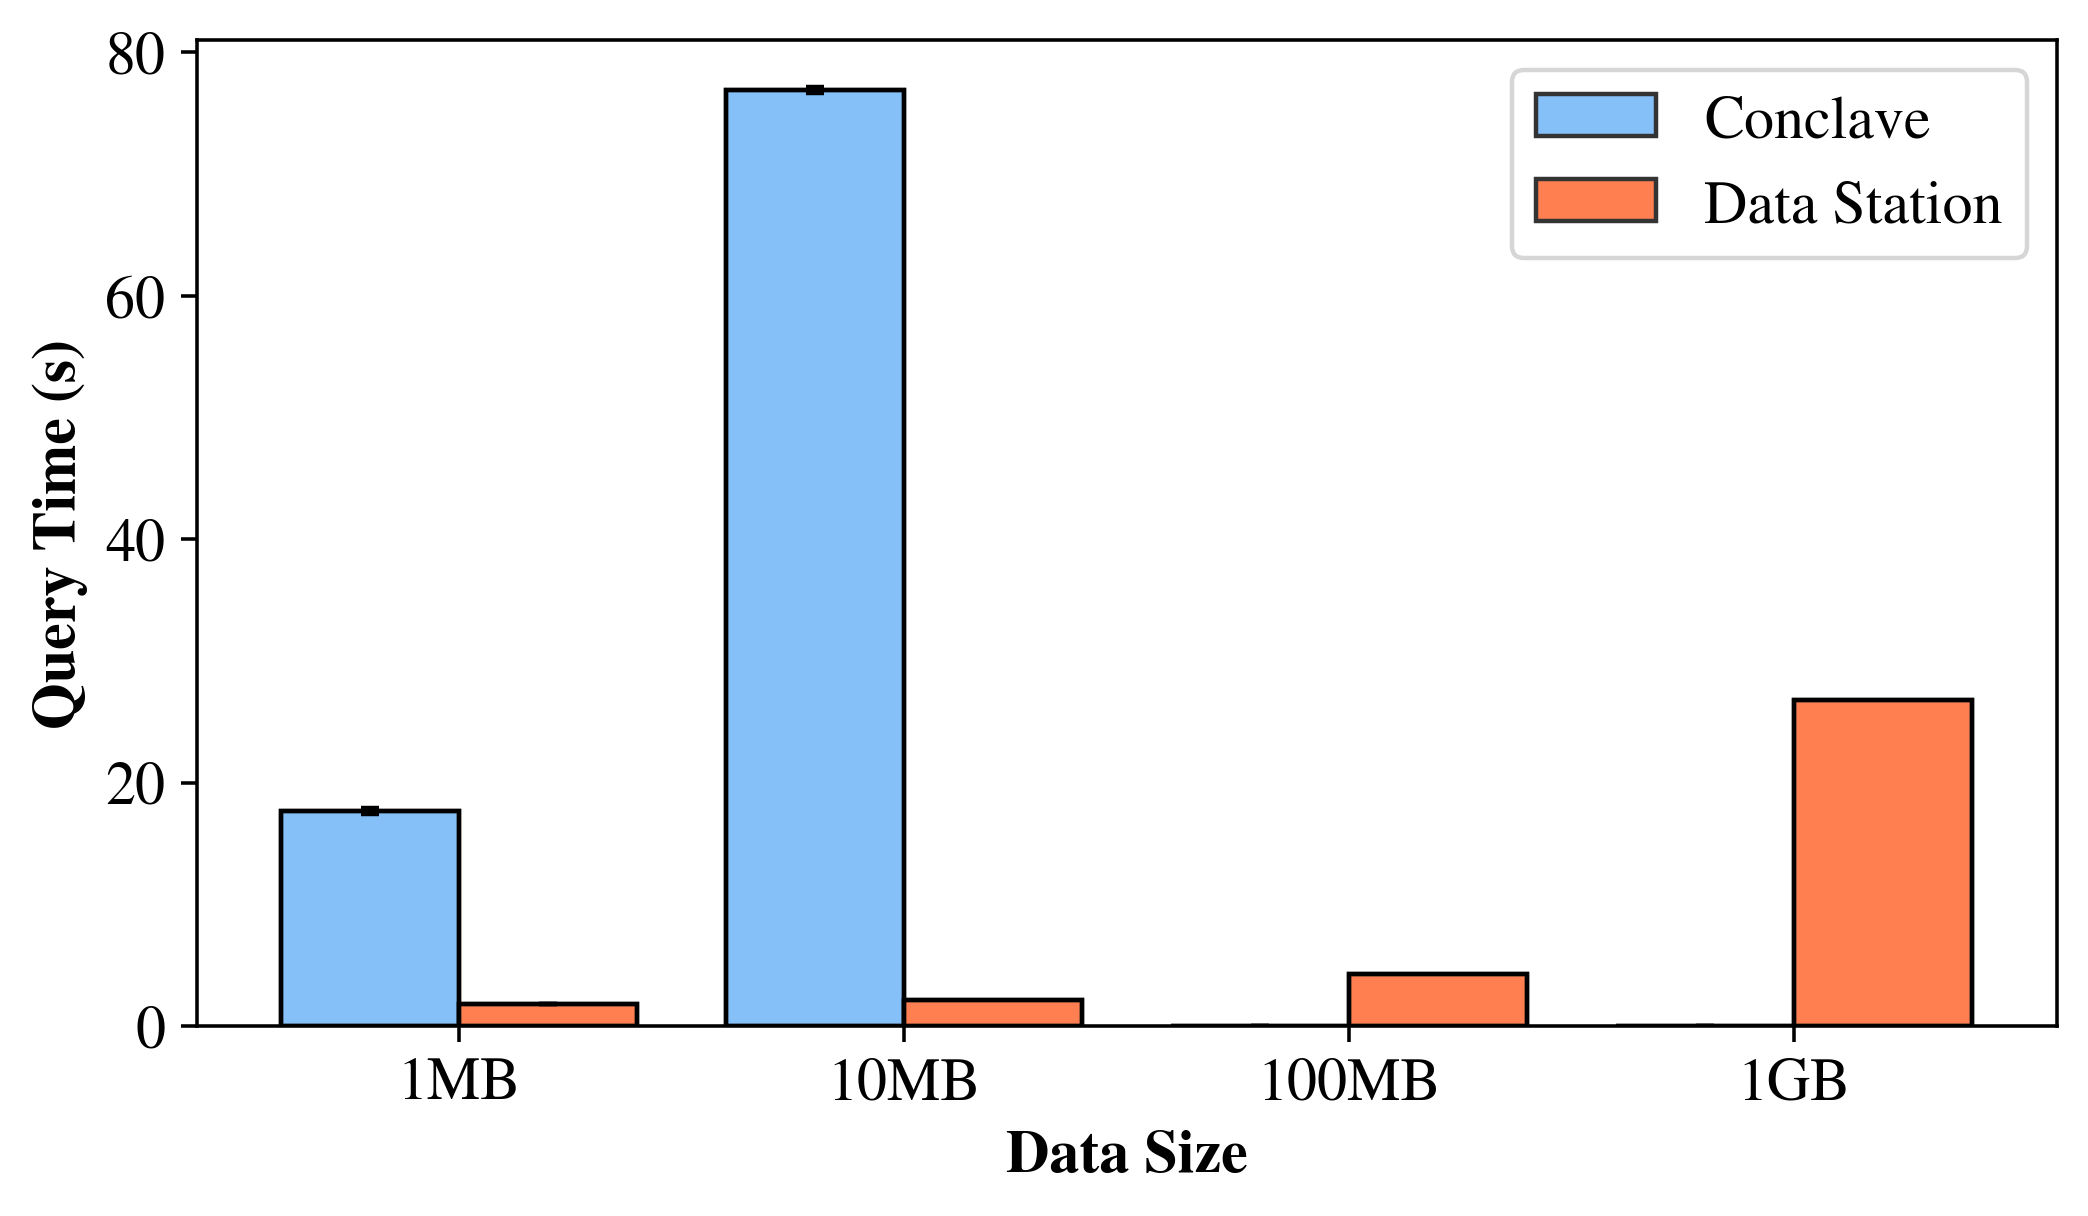

In [6]:
data_left = data_query_dict[6]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[2]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(4)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([0] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([0] * (len(data_right) - len(data_left)))
print(medians_left)

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Conclave",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
# plt.title("100GB Database Size")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("q2.pdf", bbox_inches='tight')

plt.show()
